In [25]:
import pandas as pd

# Carrega o CSV
df = pd.read_csv("../../data/campeonato-brasileiro-dataset.csv")

# Converte para JSON, orientado por registros e com indentação para melhor visualização
df.to_json("../../data/brasileirao_dates.json", orient="records", force_ascii=False, indent=4)

print("Arquivo JSON gerado com sucesso!")

Arquivo JSON gerado com sucesso!


In [26]:
import pandas as pd

# Carrega os dados do JSON
df = pd.read_json("../../data/brasileirao_dates.json")

# Exibe as primeiras linhas
print(df.head())

   ID  rodada       data   hora       mandante    visitante formacao_mandante  \
0   1       1  29/3/2003  16:00        Guarani        Vasco              None   
1   2       1  29/3/2003  16:00   Athletico-PR       Gremio              None   
2   3       1  30/3/2003  16:00       Flamengo     Coritiba              None   
3   4       1  30/3/2003  16:00          Goias     Paysandu              None   
4   5       1  30/3/2003  16:00  Internacional  Ponte Preta              None   

  formacao_visitante tecnico_mandante tecnico_visitante      vencedor  \
0               None             None              None       Guarani   
1               None             None              None  Athletico-PR   
2               None             None              None             -   
3               None             None              None             -   
4               None             None              None             -   

               arena  mandante_Placar  visitante_Placar mandante_Estado  \

In [27]:
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.limpar_colecao()
json_path = "../../data/brasileirao_dates.json"  # ajuste conforme necessário
api.importar_json_para_mongodb(json_path)

Removidos 8025 documentos.
Inseridos 8025 documentos no MongoDB.


In [28]:
# Recarregar o módulo
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Obter todos os times
    times = api.obter_todos_times()
    
    # Ordenar alfabeticamente e apresentar de forma organizada
    print("\n=== Times do Brasileirão ===\n")
    for i, time in enumerate(sorted(times), 1):
        print(f"{i:2d}. {time}")
    print(f"\nTotal de times: {len(times)}")
    
except Exception as e:
    print(f"Erro ao consultar times: {str(e)}")


=== Times do Brasileirão ===

 1. America-MG
 2. America-RN
 3. Athletico-PR
 4. Atletico-GO
 5. Atletico-MG
 6. Avai
 7. Bahia
 8. Barueri
 9. Botafogo-RJ
10. Bragantino
11. Brasiliense
12. CSA
13. Ceara
14. Chapecoense
15. Corinthians
16. Coritiba
17. Criciuma
18. Cruzeiro
19. Cuiaba
20. Figueirense
21. Flamengo
22. Fluminense
23. Fortaleza
24. Goias
25. Gremio
26. Gremio Prudente
27. Guarani
28. Internacional
29. Ipatinga
30. Joinville
31. Juventude
32. Nautico
33. Palmeiras
34. Parana
35. Paysandu
36. Ponte Preta
37. Portuguesa
38. Santa Cruz
39. Santo Andre
40. Santos
41. Sao Caetano
42. Sao Paulo
43. Sport
44. Vasco
45. Vitoria

Total de times: 45


/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:165: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  todos_times = pd.unique(list(times_home) + list(times_away))


In [30]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

# Certifique-se de que os dados já estão no MongoDB (pode ser via CSV ou JSON)
tabelas_json = api.montar_tabelas(2003, 2022)
print(tabelas_json)

{
    "2003": {
        "Guarani": {
            "jogos": 46,
            "vitorias": 17,
            "empates": 10,
            "derrotas": 19,
            "gols_marcados": 64,
            "gols_sofridos": 72,
            "pontos": 61
        },
        "Vasco": {
            "jogos": 46,
            "vitorias": 13,
            "empates": 15,
            "derrotas": 18,
            "gols_marcados": 57,
            "gols_sofridos": 69,
            "pontos": 54
        },
        "Athletico-PR": {
            "jogos": 46,
            "vitorias": 17,
            "empates": 10,
            "derrotas": 19,
            "gols_marcados": 66,
            "gols_sofridos": 72,
            "pontos": 61
        },
        "Gremio": {
            "jogos": 46,
            "vitorias": 13,
            "empates": 11,
            "derrotas": 22,
            "gols_marcados": 54,
            "gols_sofridos": 68,
            "pontos": 50
        },
        "Flamengo": {
            "jogos": 46,
           

In [31]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

# Exporta o JSON com as tabelas para um arquivo
api.exportar_tabelas_json(2003, 2022, "../../data/tabelas_brasilerao-2003-2022.json")

# Insere as tabelas agregadas em uma nova coleção no MongoDB
api.inserir_tabelas_no_mongodb(2003, 2022, "tabelas_brasilerao-2003-2022")

Arquivo JSON com as tabelas criado em: ../../data/tabelas_brasilerao-2003-2022.json
Inseridos 20 documentos na coleção 'tabelas_brasilerao-2003-2022'.


In [35]:
import json
import pandas as pd

# Carrega o JSON gerado pela função montar_tabelas ou pelo arquivo exportado
with open("../../data/tabelas_brasilerao-2003-2022.json", "r", encoding="utf-8") as f:
    tabelas = json.load(f)

# Exemplo: Visualizar a tabela de uma temporada específica, por exemplo, 2003
if "2003" in tabelas:
    dados_2003 = tabelas["2003"]
    # Converte o dicionário em DataFrame; as chaves (nomes dos times) serão os índices
    df_2003 = pd.DataFrame(dados_2003).T.reset_index().rename(columns={"index": "Time"})
    
    # Ordena pelo número de pontos em ordem decrescente
    df_2003 = df_2003.sort_values("pontos", ascending=False).reset_index(drop=True)
    
    df_2003['Posição'] = df_2003.index + 1
        
    display(df_2003[['Posição', 'Time', 'pontos', 'jogos', 'vitorias', 'empates', 'derrotas']])
else:
    print("Temporada 2003 não encontrada no JSON.")

,Posição,Time,pontos,jogos,vitorias,empates,derrotas
0,1,Cruzeiro,100,46,31,7,8
1,2,Santos,87,46,25,12,9
2,3,Sao Paulo,78,46,22,12,12
3,4,Coritiba,73,46,21,10,15
4,5,Atletico-MG,72,46,19,15,12
5,6,Sao Caetano,71,46,19,14,13
6,7,Internacional,70,46,20,10,16
7,8,Flamengo,66,46,18,12,16
8,9,Parana,65,46,18,11,17
9,10,Goias,65,46,18,11,17


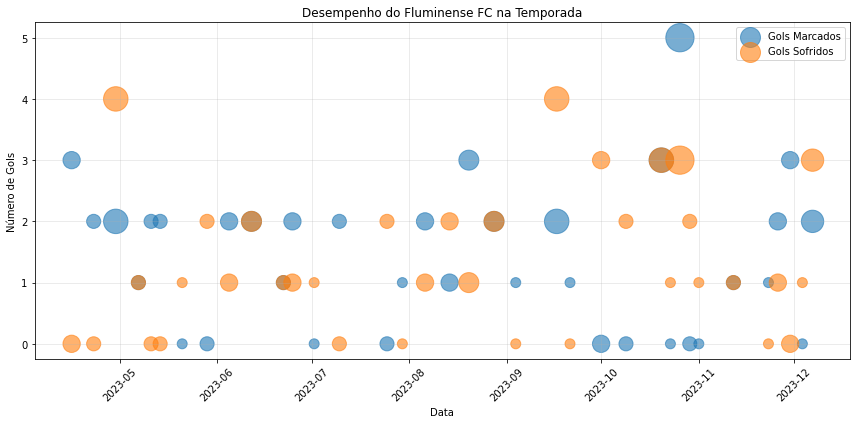

In [39]:
# Recarregar o módulo
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Criar scatter plot do desempenho do Fluminense
    api.plot_desempenho_temporada("Fluminense FC")
    
except Exception as e:
    print(f"Erro ao gerar gráfico: {str(e)}")

In [23]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api
import time

# Recarrega o módulo (caso tenha feito alterações)
importlib.reload(brasileirao_api)

# Cria instância do "novo" BrasileiraoAPI (sem API_KEY, pois não usaremos mais a API)
api = BrasileiraoAPI()

# Limpa a coleção
api.limpar_colecao()

# Importa os dados do CSV para o MongoDB
csv_path = "../../data/campeonato-brasileiro-dataset.csv"  # ajuste para o caminho do seu CSV
api.importar_csv_para_mongodb(csv_path)

# Consulta os dados no MongoDB
df = api.consultar_dados_mongodb()
print(f"Total de registros: {df.shape[0]}")
print(df.head())

# Lista os times
times = api.obter_todos_times()
print("\nTimes cadastrados:")
for time in times:
    print(f"- {time}")

Removidos 0 documentos.
Inseridos 8025 documentos no MongoDB.
Total de registros: 8025
                        _id                   homeTeam  \
0  67aea975ee2d8f92fd7da70a        {'name': 'Guarani'}   
1  67aea975ee2d8f92fd7da70b   {'name': 'Athletico-PR'}   
2  67aea975ee2d8f92fd7da70c       {'name': 'Flamengo'}   
3  67aea975ee2d8f92fd7da70d          {'name': 'Goias'}   
4  67aea975ee2d8f92fd7da70e  {'name': 'Internacional'}   

                  awayTeam                                 score    utcDate  
0        {'name': 'Vasco'}  {'fullTime': {'home': 4, 'away': 2}}  29/3/2003  
1       {'name': 'Gremio'}  {'fullTime': {'home': 2, 'away': 0}}  29/3/2003  
2     {'name': 'Coritiba'}  {'fullTime': {'home': 1, 'away': 1}}  30/3/2003  
3     {'name': 'Paysandu'}  {'fullTime': {'home': 2, 'away': 2}}  30/3/2003  
4  {'name': 'Ponte Preta'}  {'fullTime': {'home': 1, 'away': 1}}  30/3/2003  

Times cadastrados:
- America-MG
- America-RN
- Athletico-PR
- Atletico-GO
- Atletico-MG
- Avai


/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:213: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  times_away = []


Partidas encontradas para Sport: 418


/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:244: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  partidas['utcDate'] = pd.to_datetime(partidas['utcDate'], errors='coerce')


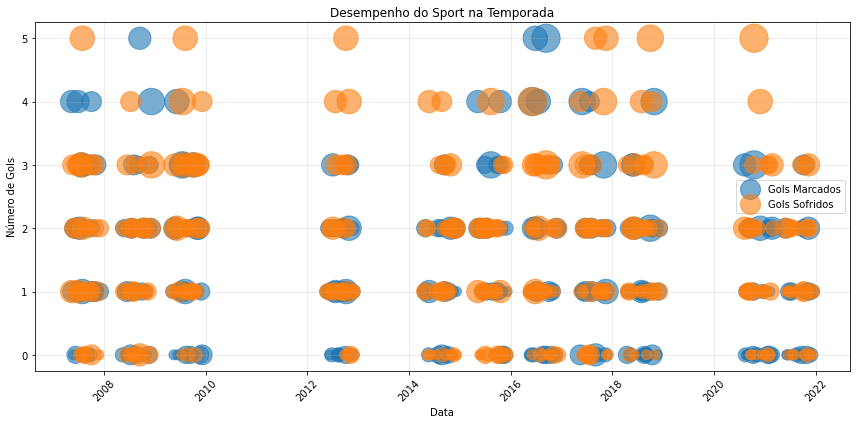

/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:285: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  partidas['utcDate'] = pd.to_datetime(partidas['utcDate'])


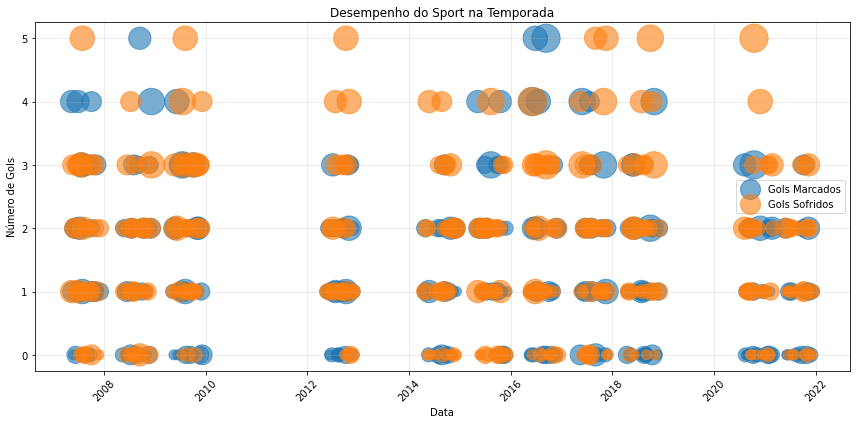

In [26]:
# Recarrega o módulo e cria a instância da classe
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api
import time

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

# (Opcional) Limpar a coleção e importar os dados do CSV se ainda não feito
# api.limpar_colecao()
# csv_path = "../../data/campeonato-brasileiro-dataset.csv"
# api.importar_csv_para_mongodb(csv_path)

# Escolha um time que esteja presente nos dados, por exemplo "Corinthians"
time_nome = "Sport"

# Verifica se há partidas para o time
df_time = api.obter_partidas_time(time_nome)
if df_time.empty:
    print(f"Nenhuma partida encontrada para o time {time_nome}.")
else:
    print(f"Partidas encontradas para {time_nome}: {df_time.shape[0]}")
    # Testa o plot de desempenho no tempo
    api.plot_desempenho_temporada(time_nome)